# Question 1

Suppose we have samples from a bivariant Gaussian with mean 
$\begin{bmatrix} 2 \\ 3 \end{bmatrix}$ and covariant $\begin{bmatrix} 2 & 2 \\ 2 & 3 \end{bmatrix}$, calculate the principle components of the data. The plot of the data is shown below.

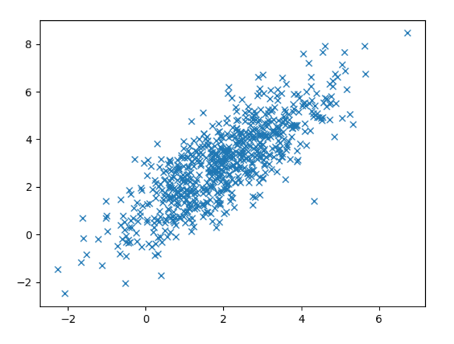

ANSWER:

The bivariant gaussian mean vector is an important component for centering the data but is not directly involved in the computation of the principle components. 

1. we need to center the data using the mean vector. This is completed by subtracting each variable in the datset by the mean. 
2. post centering the data, we calculate the covariance matrix. This matrix is interpereted as the relationship between each variable according to their variance.
3. compute Eigen Vectors through Eigen Decomposition. The Eigan Vectors represent the direction of maximum variance and the eigan values represent the magnitude of variance in that direction.

In [1]:
# calculating PCA given covariance matrix
import numpy as np

# covariance matrix
cov_m = np.array([[2, 2], [2, 3]])

# eigen values and eigen vectors
eigenvals, eigenvect = np.linalg.eig(cov_m)

print(f'Eigen values: {eigenvals}\n')

print(f'Eigen Vectors (Principal Components): {eigenvect}')

Eigen values: [0.43844719 4.56155281]

Eigen Vectors (Principal Components): [[-0.78820544 -0.61541221]
 [ 0.61541221 -0.78820544]]


# Question 2

What is the variance explained by the first component calculated in question 1

ANSWER:

The variance explained by the first principle component is always the largest Eigen value calculated from the covariance matrix. In this case - it is $max(eigenvals) = 4.56$. Because this is the highest, it is the most important, in terms of weight, that explains the spread of the data. The most total variance is captured by this component.

# Question 3

What is the variance explained by the first component calculated in question 1

ANSWER:

The variance explained by the second principle component is always the second to the largest Eigen value calculated from the covariance matrix. In this case, because it is only two values - it is $min(eigenvals) = 0.44$. This helps us to understand more of the structure and spread of the data but does not hold as much significance than the first. 

# Question 4 
Fill out the code cells.

#### Dimensionality Reduction 

We've covered feature selection and feature extraction algorithms in lecture, reducing the redundent features and keep only meaningful features can reduce overfitting.  In this assignment you will implement several common algorithms to tackle this problem.

## Feature Selection

## L1 & L2 Regularization

Recall from Unit 3, we've implemented Logistic Regression model by using sklearn LogisticRegression module, there is a hyperparameter C you need to specify when you define the LogisticRegression. This C is regularization strength and it controls how much you want to regularize the coefficients of logistic regression.  Smaller values of C specify stronger regularization.

The regularization is actually a way to select meaningful features. In the following code cells we will look at L1 and L2 regularization and do feature selection by using regularization.

L1 regularization : 

\begin{equation}
L1 :  \sum_{j=1}^m \lvert w_{j} \lvert 
\end{equation}

L2 regularization : 

\begin{equation}
L1 :  \sum_{j=1}^m w_{j}^2 
\end{equation}

In [4]:
import pandas as pd
import numpy as np
import ssl; ssl._create_default_https_context = ssl._create_stdlib_context

# Added version check for recent scikit-learn 0.18 checks
from distutils.version import LooseVersion as Version
from sklearn import __version__ as sklearn_version

In [5]:
df_wine = pd.read_csv('https://archive.ics.uci.edu/'
                      'ml/machine-learning-databases/wine/wine.data',
                      header=None)
df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',
                   'Proline']

print('Class labels', np.unique(df_wine['Class label']))
df_wine.head()

Class labels [1 2 3]


,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


## Split the data into train and test set

In [6]:
from sklearn.model_selection import train_test_split
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 8, stratify = y)

## Scale the feature

In [7]:
from sklearn.preprocessing import StandardScaler

# TODO :: It's your time to standardlize the training set and test set. (Hint : Recall from the frist problem in assignment4)
# Three lines of code expected, name standardlized training set X_train_std and standardlized test set X_test_std
scaler = StandardScaler().fit(X_train)
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

## Define L1 regularization

In [ ]:
from sklearn.linear_model import LogisticRegression

# TODO :: it's your turn to define sklearn LogisticRegression with l1 regularization with C = 0.1, fit the model on 
# X_train_std, and print the accuracy on training set and test set, expect 4 lines of code; you can refer to the 
# sklearn LogisticRegression page : https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html



## Define L2 regularization

In [ ]:
# TODO :: define L2 regularization with C = 0.1, fit the model on X_train_std, and print the accuracy on training 
# set and test set, expect 4 lines of code


In [ ]:
print("coefficients for l1 : {}".format(lr_l1.coef_))
print("coefficients for l2 : {}".format(lr_l2.coef_))

print("intercept for l1 : {}".format(lr_l1.intercept_))
print("intercept for l2 : {}".format(lr_l2.intercept_))

## Question 1 

What is the difference between the value of the coefficients of L1 versus L2? Which one do you think is better?


In [ ]:
import matplotlib.pyplot as plt

%matplotlib inline
fig = plt.figure()
ax = plt.subplot(111)
    
colors = ['blue', 'green', 'red', 'cyan', 
          'magenta', 'yellow', 'black', 
          'pink', 'lightgreen', 'lightblue', 
          'gray', 'indigo', 'orange']

weights, params = [], []
for c in np.arange(-4., 6.):
    lr = LogisticRegression(penalty='l1', C=10.**c, random_state=0, solver = 'liblinear', multi_class='auto')
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10**c)

weights = np.array(weights)

for column, color in zip(range(weights.shape[1]), colors):
    plt.plot(params, weights[:, column],
             label=df_wine.columns[column + 1],
             color=color)
plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.xlim([10**(-5), 10**5])
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.xscale('log')
plt.legend(loc='upper left')
ax.legend(loc='upper center', 
          bbox_to_anchor=(1.38, 1.03),
          ncol=1, fancybox=True)

plt.show()


## Question 2

What do you observe from the plot above?


## Sequential feature selection algorithms

In this section you will implement sequential backward selection algorithm from scratch.  Backward selection and forward selection are both greedy algorithms to select features making locally optimal choices at each stage of a combinatorial search problem.  They generally yield a suboptimal solution to the problem. Here's the psuedocode.

1. Intialize the algorithm with k = d, where d is the dimensionality of the full feature space x.

2. Determine the feature x that causes the least performance loss.

3. Remove the feature x from the feature set

4. Terminate if k equals the number of desired features, if not go to step 2.

In [ ]:
from sklearn.metrics import accuracy_score

def calc_score(estimator, X_train, y_train, X_test, y_test, indices):
    estimator.fit(X_train[:, indices], y_train)
    y_pred = estimator.predict(X_test[:, indices])
    score = accuracy_score(y_test, y_pred)
    return score

In [ ]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.base import clone
from itertools import combinations

dim = X_train_std.shape[1]

indices = tuple(range(dim))
final_subsets = [indices]
knn = KNeighborsClassifier(n_neighbors=5)

score = calc_score(knn, X_train_std, y_train, X_test_std, y_test, indices)
final_scores = [score]
k_features = 1

while dim > k_features:
    scores = []
    subsets = []

    for p in combinations(indices, r=dim - 1):
        score = calc_score(knn, X_train_std, y_train, X_test_std, y_test, p)
        scores.append(score)
        subsets.append(p)

    best = np.argmax(scores)
    indices = subsets[best]
    final_subsets.append(indices)
    dim -= 1
    final_scores.append(scores[best])

In [ ]:
k_feat = [len(k) for k in final_subsets]
plt.plot(k_feat, final_scores, marker='o')
plt.ylim([0.7, 1.02])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.tight_layout()
# plt.savefig('images/04_08.png', dpi=300)
plt.show()

## Question 3

Form the plot above, can you make the decision what is the best number of feature to keep for this dataset?


## Assessing feature importance with Random Forests

Decision tree models are invariant to the scale of the feature value because they  will iterate all the feature space to find the best way to split each node. Therefore standardlization is not needed for decision tree models. A decision tree can measure the feature importance which we can use as a reference to reduce unimportant feature.

In [ ]:
from sklearn.ensemble import RandomForestClassifier


feat_labels = df_wine.columns[1:]

# TODO :: Define RandomForestClassifier with n_estimators equals to 500 and random_state equals to 1, fit it on original
# training set, expect 2 lines of code


In [ ]:
importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), 
        importances[indices],
        align='center')

plt.xticks(range(X_train.shape[1]), 
           feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
#plt.savefig('images/04_09.png', dpi=300)
plt.show()

## Question 4

What feature and how many features do you want to keep based on the feature importance of decision tree model?


## Feature Extraction

In the above section, you implemented several feature selection algorihtms. In feature extraction, we derive information from the feature set to construct a new feature subspace. 

## Principle Component Analysis (PCA)

PCA is an unsupervised algorithm that is used for feature extraction in high-dimensional and correlated data. It transforms features into orthogonal component axes of maximum variance in a dataset. You will use pca to process data before training.

In [ ]:
import numpy as np

cov_mat = # TODO :: compute covariance matrix for the X_train_std (hint: use np.cov())
eigen_vals, eigen_vecs = # TODO :: calculate eigendecomposition


## Reduce feature to 2D

In [ ]:
# Make a list of (eigenvalue, eigenvector) tuples
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i])
               for i in range(len(eigen_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eigen_pairs.sort(key=lambda k: k[0], reverse=True)
w = np.hstack((eigen_pairs[0][1][:, np.newaxis],
               eigen_pairs[1][1][:, np.newaxis]))
print('Matrix W:\n', w)

In [ ]:
X_train_pca = X_train_std.dot(w)
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']

for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train == l, 0], 
                X_train_pca[y_train == l, 1], 
                c=c, label=l, marker=m)

plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
# plt.savefig('./figures/pca2.png', dpi=300)
plt.show()

In [ ]:
from sklearn.decomposition import PCA

# TODO :: use sklearn pca to leverage this process, and fit it on X_train_std, and call explained_variance_ratio_ on 
# pca object you defined, expect 3 lines of code


In [ ]:
plt.bar(range(1, 14), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(1, 14), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.show()

In [ ]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

In [ ]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.6, 
                    c=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver = 'lbfgs', multi_class = "auto")
lr = lr.fit(X_train_pca, y_train)

In [ ]:
plot_decision_regions(X_train_pca, y_train, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
# plt.savefig('./figures/pca3.png', dpi=300)
plt.show()

In [ ]:
plot_decision_regions(X_test_pca, y_test, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
# plt.savefig('./figures/pca4.png', dpi=300)
plt.show()

## LDA 

## Computing the scatter matrices

In [ ]:
np.set_printoptions(4)

mean_vecs = []
for label in range(1, 4):
    mean_vecs.append(np.mean(X_train_std[y_train == label], axis=0))
    print('MV %s: %s\n' % (label, mean_vecs[label - 1]))

## Compute the within-class scatter matrix:

In [ ]:
d = 13
S_W = np.zeros((d, d))
for index, mean in zip(range(1,4), mean_vecs):
    class_scatter = np.zeros((d, d)) # scatter matrix for each class
    for row in X_train_std[y_train == index]:
        row, mean = row.reshape((d, 1)), mean.reshape((d, 1)) # make column vectors
        class_scatter += (row - mean).dot((row-mean).T)
    S_W += class_scatter  # sum class scatter matrices
print("Within-class scatter matrix: %sx%s" % (S_W.shape[0], S_W.shape[1]))

In [ ]:
print('Class label distribution: %s' 
      % np.bincount(y_train)[1:])

## Normalize the within-class scatter matrix:

Since the class label is not distributed evenly, we need to normalize the with-in class scatter matrix


In [ ]:
for index in range(1,4):
    class_scatter = np.cov(X_train_std[y_train == index].T)
    S_W += class_scatter
print('Scaled within-class scatter matrix: %sx%s' % (S_W.shape[0],
                                                     S_W.shape[1]))

## Compute the between-class scatter matrix:

In [ ]:
mean_overall = np.mean(X_train_std, axis = 0)
S_B = np.zeros((d, d))
for i, mean_vec in enumerate(mean_vecs):
    n = X_train[y_train == i + 1, :].shape[0]
    mean_vec = mean_vec.reshape(d, 1)  # make column vector
    mean_overall = mean_overall.reshape(d, 1)  # make column vector
    S_B += n * (mean_vec - mean_overall).dot((mean_vec - mean_overall).T)

print('Between-class scatter matrix: %sx%s' % (S_B.shape[0], S_B.shape[1]))
    

## Selecting linear discriminants for the new feature subspace

Solve the generalized eigenvalue problem for the matrix $S_W^{-1}S_B$:

In [ ]:
eigen_vals, eigen_vecs = # TODO :: calculate the eigenvalue (hint : use np.linalg.eig and np.linalg.inv)


Sort eigenvectors in decreasing order of the eigenvalues:

In [ ]:

# Make a list of (eigenvalue, eigenvector) tuples
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i])
               for i in range(len(eigen_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eigen_pairs = sorted(eigen_pairs, key=lambda k: k[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues

print('Eigenvalues in decreasing order:\n')
for eigen_val in eigen_pairs:
    print(eigen_val[0])

In [ ]:
tot = sum(eigen_vals.real)
discr = [(i / tot) for i in sorted(eigen_vals.real, reverse=True)]
cum_discr = np.cumsum(discr)

plt.bar(range(1, 14), discr, alpha=0.5, align='center',
        label='individual "discriminability"')
plt.step(range(1, 14), cum_discr, where='mid',
         label='cumulative "discriminability"')
plt.ylabel('"discriminability" ratio')
plt.xlabel('Linear Discriminants')
plt.ylim([-0.1, 1.1])
plt.legend(loc='best')
plt.tight_layout()
# plt.savefig('./figures/lda1.png', dpi=300)
plt.show()

In [ ]:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis].real,
              eigen_pairs[1][1][:, np.newaxis].real))
print('Matrix W:\n', w)

In [ ]:
X_train_lda = X_train_std.dot(w)
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']

for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_lda[y_train == l, 0] * (-1),
                X_train_lda[y_train == l, 1] * (-1),
                c=c, label=l, marker=m)

plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower right')
plt.tight_layout()
# plt.savefig('./figures/lda2.png', dpi=300)
plt.show()

## Question 5

Compare LDA to PCA algorithm. Which one works better for this problem?



## LDA via scikit-learn


In [ ]:
if Version(sklearn_version) < '0.18':
    from sklearn.lda import LDA
else:
    from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train_std, y_train)

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr = lr.fit(X_train_lda, y_train)

plot_decision_regions(X_train_lda, y_train, classifier=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')
plt.tight_layout()
# plt.savefig('./images/lda3.png', dpi=300)
plt.show()

In [ ]:
X_test_lda = lda.transform(X_test_std)

plot_decision_regions(X_test_lda, y_test, classifier=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')
plt.tight_layout()
# plt.savefig('./images/lda4.png', dpi=300)
plt.show()